In [1]:
from tensorflow import keras
from keras.models import load_model
import pandas as pd
model = load_model("/Users/paolo/Documents/TC_old/data/model_1l_512n_relu_dropout_std.h5")
import shap
import numpy as np

import tensorflow as tf

print(f'tensorflow version {tf.__version__}')

from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import * 

import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Dropout


Metal device set to: Apple M1


2022-11-28 16:59:50.296920: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-28 16:59:50.297194: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


tensorflow version 2.10.0


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    
def test_models(model, x_test, y_test):
    
    pred = model.predict(x_test)

    plot_roc(pred,y_test)


    score = metrics.accuracy_score(y_test, np.round(pred))
    print(f"Accuracy score: {score}")


    cm = confusion_matrix(y_test, np.round(pred))
    np.set_printoptions(precision=2)
    print(cm)


In [3]:
def dataLoad():
    test = pd.read_csv('/Users/paolo/Documents/TC/data/test_real_tom_target.csv')
    train = pd.read_csv('/Users/paolo/Documents/TC/data/training_real_tom_target.csv')
    val = pd.read_csv('/Users/paolo/Documents/TC/data/validation_real_tom_target.csv')
    print(train.head())
    
    #Split data
    x_train = train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******training features******")
    print (x_train)
    y_train = train[['Real_tom_lsm']]
    print ("******training target******")
    print (y_train)
    
    #x_test = test.loc[(test.latitude == -15.0) & (test.longitude == 55), [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    x_test = test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******test features******")
    print (x_test)
    #y_test = test.loc[(test.latitude == -15.0) & (test.longitude == 55), ['Real_tom_lsm']]
    y_test = test[['Real_tom_lsm']]
    print ("******test target******")
    print (y_test)
    
    x_val = val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
    print ("******validation features******")
    print (x_val)
    y_val = val[['Real_tom_lsm']]
    print ("******validation target******")
    print (y_val)
    
    print('Before Smote')

    dff = y_train
    M = y_train.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
    
    smt = SMOTE()
    
    X_train_sm, Y_train_sm = smt.fit_resample(x_train, y_train)
    
    print('After SMOTE')
    dff = Y_train_sm
    M = Y_train_sm.to_numpy()
    # summarize dataset
    classes = unique(M)
    print(classes)
    total = len(M)
    for c in classes:
        n_examples = len(M[M==c])
        percent = n_examples / total * 100
        print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))
        
    return X_train_sm, Y_train_sm, x_val, y_val, x_test, y_test

In [4]:
x_train_sm, y_train_sm, x_val, y_val, x_test, y_test = dataLoad()


from sklearn.preprocessing import StandardScaler
trainScaler = StandardScaler()

x_train_scaled = trainScaler.fit_transform(x_train_sm)
x_val_scaled = trainScaler.transform(x_val)
x_test_scaled = trainScaler.transform(x_test)

   Unnamed: 0        time  latitude  longitude        vo          r     u_200  \
0           0  1980-01-01       0.0       20.0  0.000007  80.761185  1.909660   
1           1  1980-01-01       0.0       22.5  0.000004  80.703650  1.165733   
2           2  1980-01-01       0.0       25.0  0.000007  78.231514 -1.311676   
3           3  1980-01-01       0.0       27.5  0.000010  79.631010 -3.777573   
4           4  1980-01-01       0.0       30.0  0.000010  71.573875 -5.734505   

      u_850     v_200     v_850        ttr  sst  lsm  Real_tom_lsm  
0 -3.323872  1.687164 -1.823624 -247.54074  0.0  0.0           0.0  
1 -2.844494  1.060593 -1.991425 -240.00592  0.0  0.0           0.0  
2 -2.125244  3.280617 -1.931789 -223.76889  0.0  0.0           0.0  
3 -1.122395  5.743889 -1.243538 -235.55556  0.0  0.0           0.0  
4 -1.362953  6.514030 -0.954163 -254.03260  0.0  0.0           0.0  
******training features******
               vo          r      u_200     u_850      v_200     v_85

In [5]:
train = pd.read_csv('/Users/paolo/Documents/TC/data/training_real_tom_target.csv')
x_train = train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
y_train = train[['Real_tom_lsm']]

x_train_scaled_original = trainScaler.transform(x_train)

# FFNN

In [7]:
model = load_model("/Users/paolo/Documents/TC_old/data/model_1l_512n_relu_dropout_std.h5")

In [8]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               4608      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
None


2022-11-28 17:00:51.721611: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  123/16859 [..............................] - ETA: 20s  

2022-11-28 17:00:52.026162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 20s 1ms/step


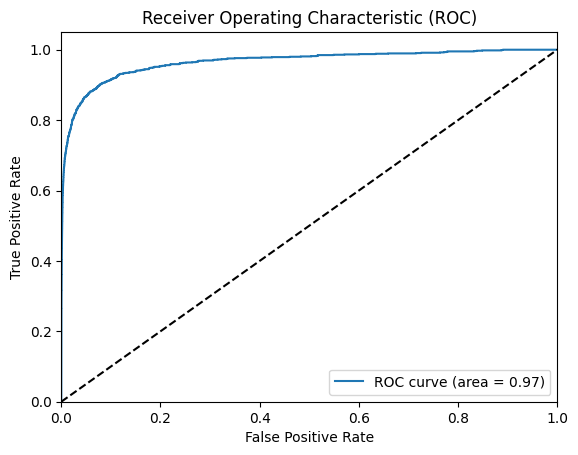

Accuracy score: 0.9264968386633969
[[498894  39544]
 [   110    939]]


In [9]:
test_models(model, x_test_scaled, y_test)

In [10]:
results = model.predict(x_test_scaled)
test = pd.read_csv('/Users/paolo/Documents/TC/data/test_real_tom_target.csv')
test['preds'] = results
test['pred_class'] = round(test.preds)

16859/16859 [==============================] - 20s 1ms/step


### calibration

In [11]:
### Brier score
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, results)

0.05360565490638507

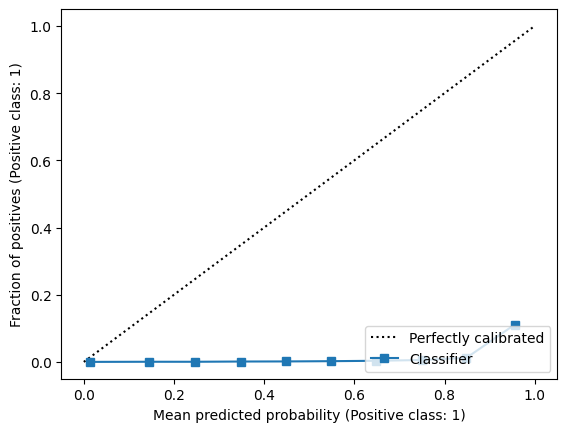

In [12]:
from sklearn.calibration import CalibrationDisplay

display = CalibrationDisplay.from_predictions(y_test, results, n_bins=10)

In [13]:
print(f'real classes \n zeros:{len(y_test.loc[y_test.Real_tom_lsm==0])/len(y_test)}\n ones:{len(y_test.loc[y_test.Real_tom_lsm==1])/len(y_test)}\n')
for i in range(10):
    print(f'{i*10}: {100*len(results[results>i*0.1])/len(results)}\n')
    

real classes 
 zeros:0.9980555601895875
 ones:0.0019444398104124844

0: 99.60110252888393

10: 25.078454161082657

20: 17.812848131650995

30: 13.328402723327903

40: 10.042688702415443

50: 7.503980633453633

60: 5.519317425628421

70: 3.867748435087407

80: 2.460300248198752

90: 1.279363543514487



# FFNN with Brier Score

In [22]:
from sklearn.metrics import brier_score_loss

In [28]:
def brier_score(y_true, y_pred):
    brier_score = tf.reduce_mean((y_pred - y_true) ** 2, axis=1)
    return brier_score

In [29]:
model_std_relu_dropout = Sequential()
model_std_relu_dropout.add(Dense(512, input_dim=8, activation='relu'))
model_std_relu_dropout.add(Dropout(0.5))
model_std_relu_dropout.add(Dense(1,activation='sigmoid')) # Output
model_std_relu_dropout.compile(loss=brier_score, optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model_std_relu_dropout.fit(x_train_scaled,y_train_sm,validation_data=(x_val_scaled,y_val),
        callbacks=[monitor],epochs=10)


Epoch 1/10


2022-11-28 17:39:04.482501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - ETA: 0s - loss: 0.0621

2022-11-28 17:53:40.356137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266255/266255 [==============================] - 915s 3ms/step - loss: 0.0621 - val_loss: 0.0497
Epoch 2/10
266255/266255 [==============================] - 913s 3ms/step - loss: 0.0588 - val_loss: 0.0587
Epoch 3/10
266255/266255 [==============================] - 4084s 15ms/step - loss: 0.0579 - val_loss: 0.0547
Epoch 4/10
266255/266255 [==============================] - 862s 3ms/step - loss: 0.0574 - val_loss: 0.0583
Epoch 5/10
266255/266255 [==============================] - 873s 3ms/step - loss: 0.0571 - val_loss: 0.0601
Epoch 6/10
266255/266255 [==============================] - 872s 3ms/step - loss: 0.0569 - val_loss: 0.0445
Epoch 7/10
266255/266255 [==============================] - 847s 3ms/step - loss: 0.0567 - val_loss: 0.0526
Epoch 8/10
266255/266255 [==============================] - 853s 3ms/step - loss: 0.0566 - val_loss: 0.0504
Epoch 9/10
266255/266255 [==============================] - 852s 3ms/step - loss: 0.0564 - val_loss: 0.0506
Epoch 10/10
266255/266255 [==========

   37/16859 [..............................] - ETA: 48s  

2022-11-28 21:27:31.520627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16859/16859 [==============================] - 19s 1ms/step


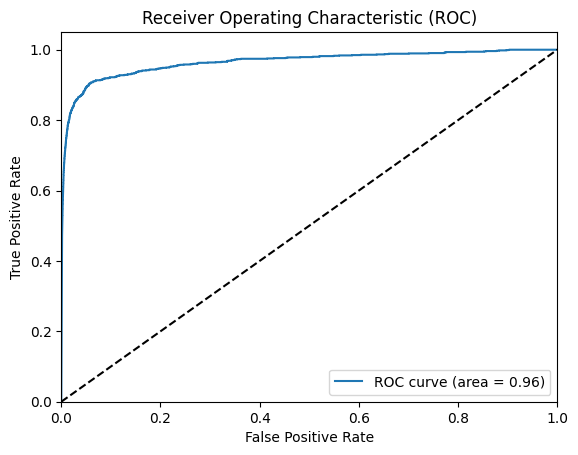

Accuracy score: 0.9300168493402066
[[500774  37664]
 [    91    958]]


In [30]:
test_models(model_std_relu_dropout, x_test_scaled, y_test)

In [32]:
results = model_std_relu_dropout.predict(x_test_scaled)

16859/16859 [==============================] - 22s 1ms/step


In [33]:
### Brier score
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, results)

0.053336791594691936

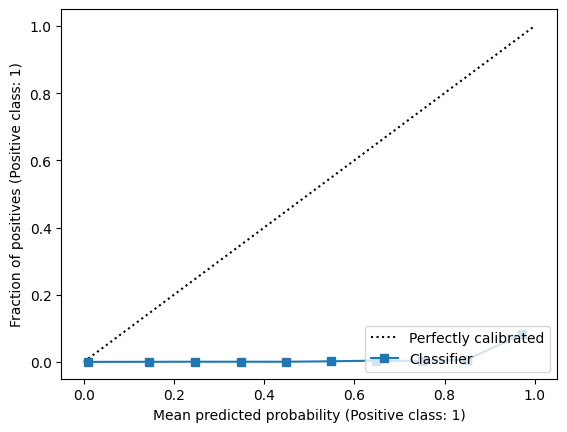

In [34]:
from sklearn.calibration import CalibrationDisplay

display = CalibrationDisplay.from_predictions(y_test, results, n_bins=10)